In [17]:
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.0.6_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.0.6_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.0.6_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.0.6_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:

# Define the path to the dataset
dataset = "UberBoston.csv"

# Initialize a variable to store the DataFrame chunks
chunks = []

# Read in the data types of the columns from the first row of the dataset
# This is necessary because we will need the data types in subsequent cells,
# and we want to avoid reading the entire dataset into memory just to get the data types.
dtypes = pd.read_csv(dataset, nrows=1).dtypes

# We will use the 'latin-1' encoding as a catch-all for potentially problematic encoding issues,
# but feel free to adjust this if you know the encoding of your dataset.
chunk_size = 50000  # Modify this as needed based on your available memory
chunks = pd.read_csv(dataset, chunksize=chunk_size, encoding="latin-1")


In [11]:
dataset = "UberBoston.csv"
chunk_size = 10000  # Adjust chunk size based on your memory constraints
chunks = pd.read_csv(dataset, chunksize=chunk_size)

total_rows = 0
UberData_info = {}

for df_chunk in chunks:
    # Update total rows with the number of rows in the current chunk
    total_rows += len(df_chunk)
    
    # Initialize UberData_info with columns if it's empty
    if not UberData_info:
        UberData_info = {column: 0 for column in df_chunk.columns}
    
    # Update the null value counts for each column
    for column in df_chunk.columns:
        UberData_info[column] += df_chunk[column].isnull().sum()

total_features = len(UberData_info)

print(f"Uber Dataset Attributes: {list(UberData_info.keys())}\n")
print(f"Total number of features: {total_features}")
print(f"Total number of rows: {total_rows}\n")
print("Feature information (Feature Attribute, Null Values Count):")

for feature, null_count in UberData_info.items():
    print(f"{feature}: {null_count} missing values")


Uber Dataset Attributes: ['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone', 'source', 'destination', 'cab_type', 'product_id', 'name', 'price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'short_summary', 'long_summary', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime']

Total number of features: 57
Total numb

In [24]:
# No need to re-import libraries or re-read the file

# Initialize counters for aggregated information
total_missing_values = {}
total_rows = 0

# Process each chunk
for df_chunk in chunks:
    # Update total rows with the number of rows in the current chunk
    total_rows += len(df_chunk)
    
    # Aggregate the missing values for each column
    chunk_missing_values = df_chunk.isnull().sum()
    total_missing_values = {column: total_missing_values.get(column, 0) + chunk_missing_values[column]
                            for column in df_chunk.columns}

# Identify columns with missing values
columns_with_missing_values = {col: val for col, val in total_missing_values.items() if val > 0}
total_columns_with_missing_values = len(columns_with_missing_values)

# Print the results
print(f"Total number of rows: {total_rows}")
print(f"Total number of columns with missing values: {total_columns_with_missing_values}")
if total_columns_with_missing_values > 0:
    print("Columns with missing values and their data types:")
    for column, missing_count in columns_with_missing_values.items():
        dtype = dtypes[column]
        print(f"{column} ({dtype}): {missing_count} missing values")
else:
    print("No columns have missing values.")


Total number of rows: 693071
Total number of columns with missing values: 1
Columns with missing values and their data types:
price (int64): 55095 missing values


Mean: 16.54512549061407
Median: 13.5
Mode: 7.0


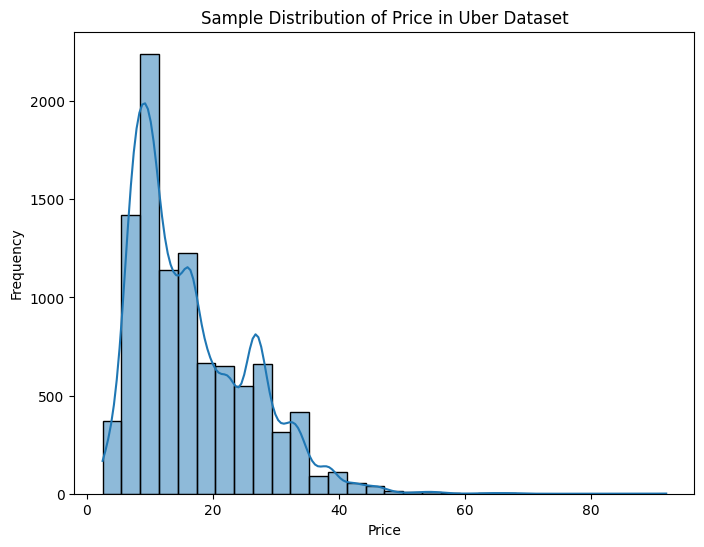

In [25]:
# Initialize summary statistics variables
total_count = 0
sum_value = 0
values = []

# Since 'chunks' is an iterator, it can only be used once. If you want to iterate again,
# you need to redefine it. This is a limitation of using chunking with pandas.
chunks = pd.read_csv(dataset, chunksize=chunk_size, encoding="latin-1")

# Process each chunk
for df_chunk in chunks:
    # Update sum and count for mean calculation
    sum_value += df_chunk['price'].sum()
    total_count += df_chunk['price'].count()
    
    # Append the non-null values to the values list for median and mode calculation
    values.extend(df_chunk['price'].dropna().values)

# Calculate mean, median, and mode
mean_value = sum_value / total_count
median_value = np.median(values)
mode_value = pd.Series(values).mode().iloc[0]

# Print summary statistics
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")

# Sample a subset of the 'price' values for the histogram
sample_size = min(len(values), 10000)  # Adjust sample size as needed
sample_values = np.random.choice(values, size=sample_size, replace=False)

# Plot the histogram of the sample
plt.figure(figsize=(8, 6))
sns.histplot(sample_values, bins=30, kde=True)
plt.title('Sample Distribution of Price in Uber Dataset')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


Mean: 16.545125490614065
Median: 13.5
Mode: 7.0


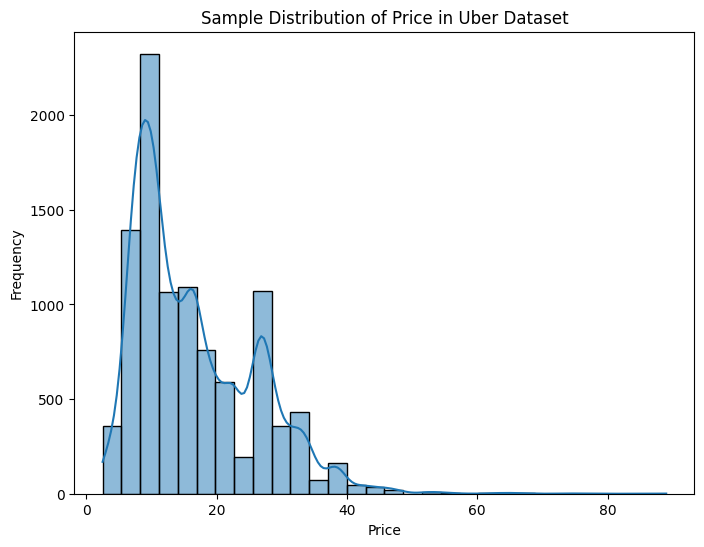

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

dataset = "UberBoston.csv"
chunk_size = 10000  # Adjust chunk size based on your memory constraints
chunks = pd.read_csv(dataset, chunksize=chunk_size)

total_count = 0
sum_value = 0
values = []

# Process each chunk
for df_chunk in chunks:
    # Update sum and count for mean calculation
    sum_value += df_chunk['price'].sum()
    total_count += df_chunk['price'].count()
    
    # Append the non-null values to the values list for median and mode calculation
    values.extend(df_chunk['price'].dropna().values)

# Calculate mean, median, and mode
mean_value = sum_value / total_count if total_count != 0 else float('nan')
median_value = np.median(values)
mode_value = pd.Series(values).mode().iloc[0]

print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")

# Now, if you want to plot the distribution, you can't plot the entire dataset
# Instead, plot a random sample
sample_size = 10000  # Adjust this as needed
if len(values) > sample_size:
    sample_values = np.random.choice(values, size=sample_size, replace=False)
else:
    sample_values = values

plt.figure(figsize=(8, 6))
sns.histplot(sample_values, bins=30, kde=True)
plt.title('Sample Distribution of Price in Uber Dataset')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


Global median of price: 13.5


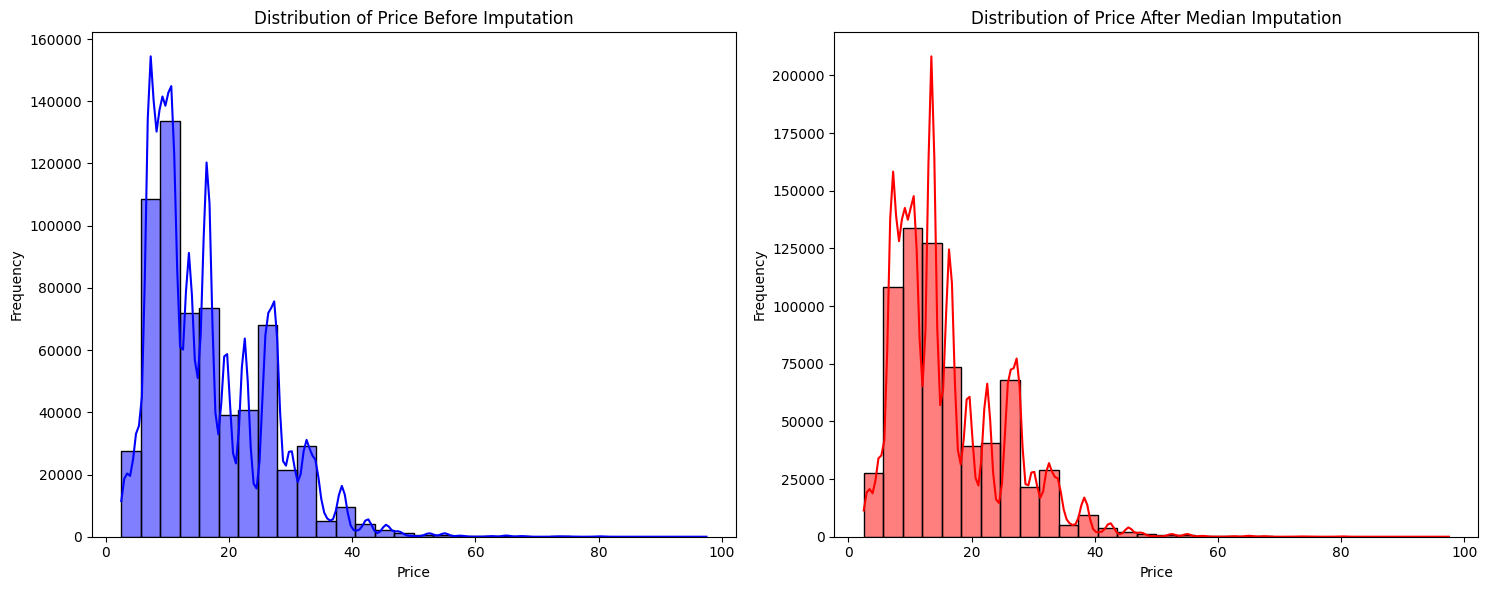

In [32]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Variables from previous cells
# dataset = "UberBoston.csv"
# chunk_size = 10000  # Or whatever chunk size you've been using

# # We need to calculate the global median from the chunks
# price_values = []

# # Read the data in chunks and build the list of non-null prices
# chunks = pd.read_csv(dataset, chunksize=chunk_size, encoding="latin-1")
# for df_chunk in chunks:
#     price_values.extend(df_chunk['price'].dropna().values)

# # Calculate the global median
# global_median = np.median(price_values)
# print(f"Global median of price: {global_median}")

# # Re-read the data in chunks and apply the median imputation
# chunks = pd.read_csv(dataset, chunksize=chunk_size, encoding="latin-1")

# # Initialize lists to store prices for plotting distributions
# prices_before_imputation = []
# prices_after_imputation = []

# # Process each chunk
# for df_chunk in chunks:
#     # Store prices before imputation
#     prices_before_imputation.extend(df_chunk['price'].dropna().values)
    
#     # Apply the median imputation
#     df_chunk['price'].fillna(global_median, inplace=True)
    
#     # Store prices after imputation
#     prices_after_imputation.extend(df_chunk['price'].values)

# # Now plot the distributions before and after imputation
# plt.figure(figsize=(15, 6))

# # Plot 1: Before Imputation
# plt.subplot(1, 2, 1)
# sns.histplot(prices_before_imputation, bins=30, kde=True, color='blue')
# plt.title('Distribution of Price Before Imputation')
# plt.xlabel('Price')
# plt.ylabel('Frequency')

# # Plot 2: After Imputation
# plt.subplot(1, 2, 2)
# sns.histplot(prices_after_imputation, bins=30, kde=True, color='red')
# plt.title('Distribution of Price After Median Imputation')
# plt.xlabel('Price')
# plt.ylabel('Frequency')

# plt.tight_layout()
# plt.show()


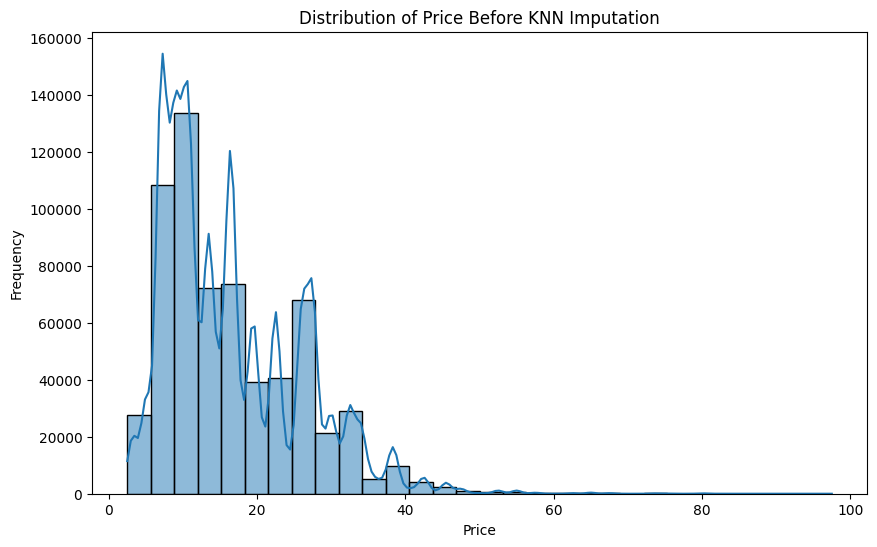

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = "UberBoston.csv"
chunk_size = 10000  # Modify chunk size based on your memory constraints

# Create an empty list to store 'price' values from each chunk
prices_before_imputation = []

# Create an iterator to read in chunks of the dataset
chunks = pd.read_csv(dataset, chunksize=chunk_size, encoding="latin-1")

# Iterate over each chunk
for df_chunk in chunks:
    # Extend the list with 'price' column values from the current chunk
    prices_before_imputation.extend(df_chunk['price'].dropna().values)

# Now you have a list of all 'price' values before imputation
# You can plot the distribution using seaborn's histplot
plt.figure(figsize=(10, 6))
sns.histplot(prices_before_imputation, bins=30, kde=True)
plt.title('Distribution of Price Before KNN Imputation')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


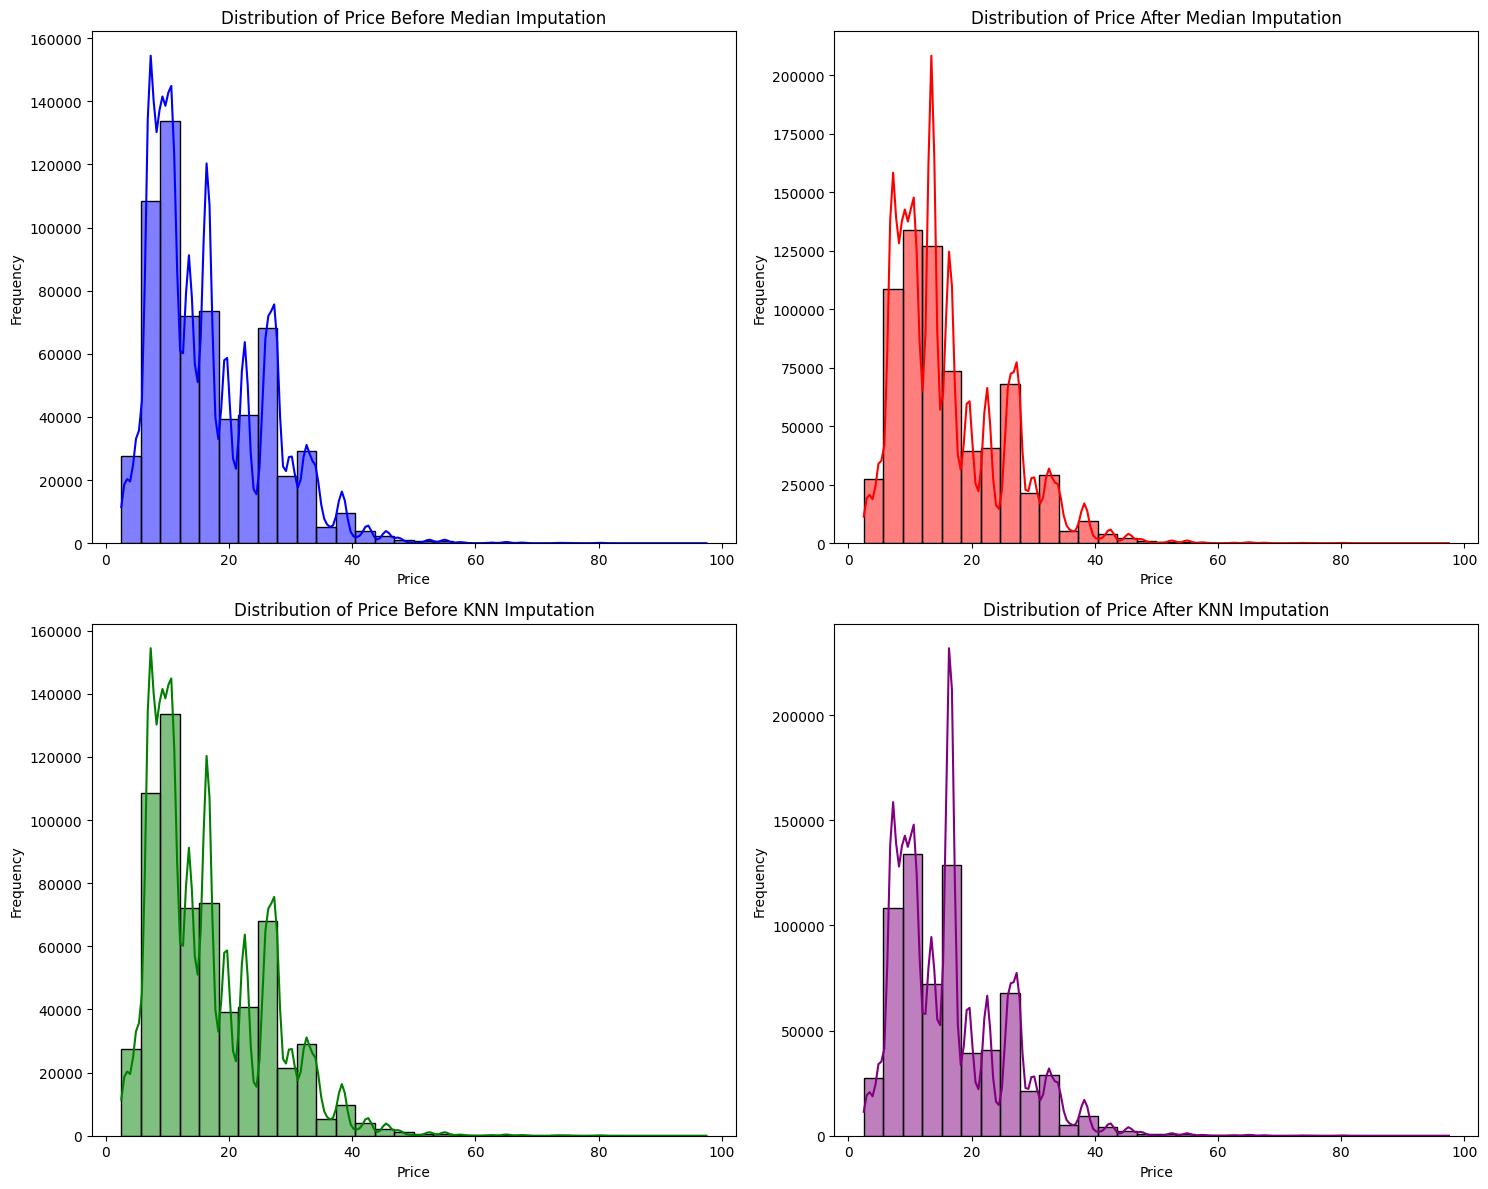

In [11]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Variables from the previous cells
dataset = "UberBoston.csv"
chunk_size = 10000  # Or whatever chunk size you've been using

# Calculate the global median for median imputation
price_values = []
chunks = pd.read_csv(dataset, chunksize=chunk_size, encoding="latin-1")
for df_chunk in chunks:
    price_values.extend(df_chunk['price'].dropna().values)
global_median = np.median(price_values)

# Median Imputation
chunks = pd.read_csv(dataset, chunksize=chunk_size, encoding="latin-1")
prices_before_median_imputation = []
prices_after_median_imputation = []
for df_chunk in chunks:
    prices_before_median_imputation.extend(df_chunk['price'].dropna().values)
    df_chunk['price'].fillna(global_median, inplace=True)
    prices_after_median_imputation.extend(df_chunk['price'].values)

# KNN Imputation
chunks = pd.read_csv(dataset, chunksize=chunk_size, encoding="latin-1")
imputed_df_knn = pd.DataFrame()
for df_chunk in chunks:
    knn_imputer = KNNImputer(n_neighbors=3)
    df_chunk['price_knn_imputed'] = knn_imputer.fit_transform(df_chunk[['price']])
    imputed_df_knn = pd.concat([imputed_df_knn, df_chunk], ignore_index=True)

# Plotting
plt.figure(figsize=(15, 12))

# Plot 1: Before Imputation
plt.subplot(2, 2, 1)
sns.histplot(prices_before_median_imputation, bins=30, kde=True, color='blue')
plt.title('Distribution of Price Before Median Imputation')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Plot 2: After Median Imputation
plt.subplot(2, 2, 2)
sns.histplot(prices_after_median_imputation, bins=30, kde=True, color='red')
plt.title('Distribution of Price After Median Imputation')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Plot 3: Before KNN Imputation
plt.subplot(2, 2, 3)
sns.histplot(imputed_df_knn['price'].dropna().values, bins=30, kde=True, color='green')
plt.title('Distribution of Price Before KNN Imputation')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Plot 4: After KNN Imputation
plt.subplot(2, 2, 4)
sns.histplot(imputed_df_knn['price_knn_imputed'], bins=30, kde=True, color='purple')
plt.title('Distribution of Price After KNN Imputation')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming it's already cleaned and imputed)
df = pd.read_csv("UberBoston.csv")

# Select only numerical features for PCA
# If 'id' is not a feature you want to include in PCA, exclude it
numerical_features = df.select_dtypes(include=[np.number])

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(numerical_features)

# Apply PCA
pca = PCA(n_components=2)  # We choose 2 for the purpose of visualization
principalComponents = pca.fit_transform(df_scaled)

# Since we're fitting PCA on two components, we should only create two columns
principal_df = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Calculate the distance from each point to the origin
distances = np.linalg.norm(principalComponents, axis=1)
outlier_scores = pd.Series(distances)

# Plot the outlier scores
plt.figure(figsize=(10,6))
plt.title("Outlier Scores from PCA")
sns.histplot(outlier_scores, kde=True)
plt.xlabel("Distance from Origin")
plt.ylabel("Frequency")
plt.show()

# Identify potential outliers
threshold = np.percentile(distances, 95)
outliers = outlier_scores > threshold

# Plot the results on the PCA-transformed data
plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', data=principal_df, hue=outliers)
plt.title('PCA of Uber Dataset (Outliers Highlighted)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# You can save the indices or boolean series to inspect in the original dataframe
df_outliers = df[outliers]


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
`````````````````````````111

In [2]:
# import pprint

# complex_data = {
#     "list": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#     "nested_dict": {"key1": "value1", "key2": "value2", "key3": {"subkey1": "subvalue1", "subkey2": "subvalue2"}},
#     "string": "This is a long string that will wrap across multiple lines if we pprint it",
#     "tuple": (1, 2, 3, 4, 5)
# }

# # Using standard print
# print("Using print:")
# print(complex_data)

# # Using pprint
# print("\nUsing pprint:")
# pprint.pprint(complex_data)


Using print:
{'list': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'nested_dict': {'key1': 'value1', 'key2': 'value2', 'key3': {'subkey1': 'subvalue1', 'subkey2': 'subvalue2'}}, 'string': 'This is a long string that will wrap across multiple lines if we pprint it', 'tuple': (1, 2, 3, 4, 5)}

Using pprint:
{'list': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'nested_dict': {'key1': 'value1',
                 'key2': 'value2',
                 'key3': {'subkey1': 'subvalue1', 'subkey2': 'subvalue2'}},
 'string': 'This is a long string that will wrap across multiple lines if we '
           'pprint it',
 'tuple': (1, 2, 3, 4, 5)}
